##### First Steps with DataFrame Class

In [37]:
import numpy as np
import pandas as pd 

In [38]:
df = pd.DataFrame([10, 20, 30, 40], columns = ['numbers'], 
                                    index = ['a', 'b', 'c', 'd'])

In [39]:
df

,numbers
a,10
b,20
c,30
d,40


In [40]:
df.index # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [41]:
df.columns # the column names

Index(['numbers'], dtype='object')

In [42]:
df.ix['c']

/Users/daesikkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


numbers    30
Name: c, dtype: int64

In [43]:
df.loc['c']  # selection via idex

numbers    30
Name: c, dtype: int64

In [44]:
df.loc[['a', 'b']]  # selection of multiple indices

,numbers
a,10
b,20


In [45]:
df.loc[df.index[1:3]]

,numbers
b,20
c,30


In [46]:
df.iloc[1:3] # selection via Index object (positional indexing)

,numbers
b,20
c,30


In [47]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [48]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [49]:
df ** 2  # again square, this thime NumPy-like (ndarray)

,numbers
a,100
b,400
c,900
d,1600


In [50]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)  # new column in generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [51]:
df['floats']  #selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [52]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'], index = ['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [78]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, ignore_index = True)  
# temporary object; df not changed

,floats,names,numbers
0,1.50,Guido,10
1,2.50,Felix,20
2,3.50,Francesc,30
3,4.50,Yves,40
4,5.75,Henry,100


In [87]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, index= ['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [88]:
df.join(pd.DataFrame([1, 4, 9, 16, 25], 
                    index = ['a', 'b', 'c', 'd', 'y'],
                    columns = ['squares',]))

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [89]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                         index = ['a', 'b', 'c', 'd', 'y'],
                         columns = ['squares',]), 
            how = 'outer')
# other options are 'innner', 'left', 'right. 
# inner --> intersection, left --> called method, right --> to be joied object
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [90]:
df[['numbers', 'squares']].mean()  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [91]:
df[['numbers', 'squares']].std()  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

##### Second Steps with DataFrame Class

In [93]:
'''generate a numpy.ndarry with, nine rows and four columns of pseudorandom, 
standard normally distributed numbers :''' 
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 0.380911,  0.024535,  0.800245,  0.147875],
       [ 1.583379,  2.208634, -0.423587, -0.667226],
       [-1.821917,  1.392149,  2.096399,  2.281189],
       [ 1.314846,  1.304762, -1.495905,  1.446288],
       [-1.001206,  0.389551, -0.065746,  0.11285 ],
       [-1.041195, -1.392418, -0.735167, -0.072044],
       [-0.051632, -0.588757,  1.409624, -0.634042],
       [-0.625838, -0.450519, -0.924278, -1.619039],
       [-0.68893 ,  0.78996 ,  0.99814 ,  0.564535]])

In [95]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.380911,0.024535,0.800245,0.147875
1,1.583379,2.208634,-0.423587,-0.667226
2,-1.821917,1.392149,2.096399,2.281189
3,1.314846,1.304762,-1.495905,1.446288
4,-1.001206,0.389551,-0.065746,0.112850
5,-1.041195,-1.392418,-0.735167,-0.072044
6,-0.051632,-0.588757,1.409624,-0.634042
7,-0.625838,-0.450519,-0.924278,-1.619039
8,-0.688930,0.789960,0.998140,0.564535


In [96]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,0.380911,0.024535,0.800245,0.147875
1,1.583379,2.208634,-0.423587,-0.667226
2,-1.821917,1.392149,2.096399,2.281189
3,1.314846,1.304762,-1.495905,1.446288
4,-1.001206,0.389551,-0.065746,0.112850
5,-1.041195,-1.392418,-0.735167,-0.072044
6,-0.051632,-0.588757,1.409624,-0.634042
7,-0.625838,-0.450519,-0.924278,-1.619039
8,-0.688930,0.789960,0.998140,0.564535


In [97]:
df['No2'][3]

1.3047624355344318

In [99]:
dates = pd.date_range('2015-1-1', periods = 9, freq = 'M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [101]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,0.380911,0.024535,0.800245,0.147875
2015-02-28,1.583379,2.208634,-0.423587,-0.667226
2015-03-31,-1.821917,1.392149,2.096399,2.281189
2015-04-30,1.314846,1.304762,-1.495905,1.446288
2015-05-31,-1.001206,0.389551,-0.065746,0.112850
2015-06-30,-1.041195,-1.392418,-0.735167,-0.072044
2015-07-31,-0.051632,-0.588757,1.409624,-0.634042
2015-08-31,-0.625838,-0.450519,-0.924278,-1.619039
2015-09-30,-0.688930,0.789960,0.998140,0.564535


In [102]:
np.array(df).round(6)

array([[ 0.380911,  0.024535,  0.800245,  0.147875],
       [ 1.583379,  2.208634, -0.423587, -0.667226],
       [-1.821917,  1.392149,  2.096399,  2.281189],
       [ 1.314846,  1.304762, -1.495905,  1.446288],
       [-1.001206,  0.389551, -0.065746,  0.11285 ],
       [-1.041195, -1.392418, -0.735167, -0.072044],
       [-0.051632, -0.588757,  1.409624, -0.634042],
       [-0.625838, -0.450519, -0.924278, -1.619039],
       [-0.68893 ,  0.78996 ,  0.99814 ,  0.564535]])

##### Basic Analytics

In [103]:
df.sum()

No1   -1.951582
No2    3.677898
No3    1.659724
No4    1.560386
dtype: float64

In [105]:
df.mean()

No1   -0.216842
No2    0.408655
No3    0.184414
No4    0.173376
dtype: float64

In [106]:
df.cumsum() # cumulative sum

,No1,No2,No3,No4
2015-01-31,0.380911,0.024535,0.800245,0.147875
2015-02-28,1.964291,2.233169,0.376658,-0.519351
2015-03-31,0.142374,3.625318,2.473057,1.761838
2015-04-30,1.457220,4.930081,0.977152,3.208126
2015-05-31,0.456014,5.319632,0.911406,3.320976
2015-06-30,-0.585181,3.927214,0.176239,3.248931
2015-07-31,-0.636813,3.338457,1.585863,2.614889
2015-08-31,-1.262652,2.887938,0.661585,0.995851
2015-09-30,-1.951582,3.677898,1.659724,1.560386


In [107]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.216842,0.408655,0.184414,0.173376
std,1.130966,1.133599,1.200457,1.164690
min,-1.821917,-1.392418,-1.495905,-1.619039
25%,-1.001206,-0.450519,-0.735167,-0.634042
50%,-0.625838,0.389551,-0.065746,0.112850
75%,0.380911,1.304762,0.998140,0.564535
max,1.583379,2.208634,2.096399,2.281189


In [108]:
np.sqrt(df)

/Users/daesikkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,No1,No2,No3,No4
2015-01-31,0.617180,0.156637,0.894564,0.384546
2015-02-28,1.258324,1.486147,NaN,NaN
2015-03-31,NaN,1.179894,1.447895,1.510361
2015-04-30,1.146667,1.142262,NaN,1.202617
2015-05-31,NaN,0.624141,NaN,0.335931
2015-06-30,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,1.187276,NaN
2015-08-31,NaN,NaN,NaN,NaN
2015-09-30,NaN,0.888797,0.999069,0.751356


In [109]:
np.sqrt(df).sum()

/Users/daesikkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


No1    3.022171
No2    5.477878
No3    4.528804
No4    4.184810
dtype: float64

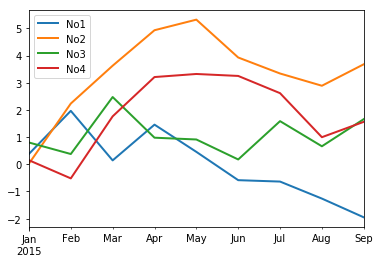

In [111]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

##### Series Class